In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [56]:
df=pd.read_csv("tips.csv")
df

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,NaN,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


In [57]:
df.isnull().sum()

Unnamed: 0     0
total_bill    39
tip            0
sex            0
smoker         0
day            0
time           0
size           0
dtype: int64

In [58]:
df.isnull().sum().sum()

39

In [59]:
df['total_bill'].isnull().sum()

39

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  205 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


In [61]:
m=df['total_bill'].mean()
m

21.36019512195122

In [62]:
df['total_bill']=df['total_bill'].fillna(m)

In [63]:
df

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.990000,1.01,Female,No,Sun,Dinner,2
1,1,21.360195,1.66,Male,No,Sun,Dinner,3
2,2,21.010000,3.50,Male,No,Sun,Dinner,3
3,3,23.680000,3.31,Male,No,Sun,Dinner,2
4,4,24.590000,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.030000,5.92,Male,No,Sat,Dinner,3
240,240,27.180000,2.00,Female,Yes,Sat,Dinner,2
241,241,22.670000,2.00,Male,Yes,Sat,Dinner,2
242,242,17.820000,1.75,Male,No,Sat,Dinner,2


In [64]:
df.isnull().sum()

Unnamed: 0    0
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [65]:
for col in df.columns:
    print(col,":", len(df[col].unique()),' labels')

Unnamed: 0 : 244  labels
total_bill : 195  labels
tip : 123  labels
sex : 2  labels
smoker : 2  labels
day : 4  labels
time : 2  labels
size : 6  labels


In [66]:
categorical_columns = ['sex', 'smoker', 'day', 'time']

# Create one-hot encoder object
encoder = OneHotEncoder()

# Fit encoder to the selected categorical columns
encoder.fit(df[categorical_columns])

# Transform the selected categorical columns
onehot_encoded = encoder.transform(df[categorical_columns])

# Convert sparse matrix to array and convert to DataFrame
onehot_encoded_df = pd.DataFrame(onehot_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded DataFrame with the non-categorical columns
final_df = pd.concat([df.drop(columns=categorical_columns), onehot_encoded_df], axis=1)
final_df

,Unnamed: 0,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,0,16.990000,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,21.360195,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2,21.010000,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3,23.680000,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,4,24.590000,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,29.030000,5.92,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,240,27.180000,2.00,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,241,22.670000,2.00,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,242,17.820000,1.75,2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [67]:

from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Sample DataFrame


# Selected categorical columns
categorical_columns = ['sex', 'smoker', 'day', 'time']

# Create label encoder object
label_encoder = LabelEncoder()

# Encode each categorical column and concatenate with the non-categorical column
final_df = pd.DataFrame()
for col in categorical_columns:
    encoded_column = label_encoder.fit_transform(df[col])
    final_df[col] = encoded_column

# Concatenate the non-categorical column with the encoded columns

df['sex']=final_df['sex']
df['smoker']=final_df['smoker']
df['day']=final_df['day']
df['time']=final_df['time']
df


,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.990000,1.01,0,0,2,0,2
1,1,21.360195,1.66,1,0,2,0,3
2,2,21.010000,3.50,1,0,2,0,3
3,3,23.680000,3.31,1,0,2,0,2
4,4,24.590000,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...,...
239,239,29.030000,5.92,1,0,1,0,3
240,240,27.180000,2.00,0,1,1,0,2
241,241,22.670000,2.00,1,1,1,0,2
242,242,17.820000,1.75,1,0,1,0,2


One-hot encoding is a technique used in machine learning to represent categorical data as binary vectors. In this encoding, each category is represented as a binary vector with all zeros except for a single one at the index corresponding to the category's position in the list of possible categories.

Here's how it works:

Identify Categories: First, you identify all the unique categories in your categorical variable.

Assign Indices: Next, you assign a unique index to each category. This can be done arbitrarily, such as assigning the index based on the alphabetical order of the categories.

Create Binary Vectors: For each category, create a binary vector where the length of the vector is equal to the number of unique categories. Set the element at the index corresponding to the category's assigned index to 1, and all other elements to 0.

Here's an example:

Let's say you have a categorical variable representing the colors of fruits: ['red', 'green', 'blue'].

'red' could be represented as [1, 0, 0]
'green' could be represented as [0, 1, 0]
'blue' could be represented as [0, 0, 1]
In this way, each category is uniquely represented by a binary vector, which can then be used as input to machine learning algorithms.

One-hot encoding is commonly used with categorical variables in machine learning pipelines because it allows algorithms to efficiently process and learn from categorical data. Many machine learning libraries, such as scikit-learn in Python, provide built-in functions for performing one-hot encoding.






In [68]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Sample categorical data
categories = ['red', 'green', 'blue', 'red', 'green']

# Reshape the data into a column vector
categories = np.array(categories).reshape(-1, 1)

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
one_hot_encoded = encoder.fit_transform(categories)

print("Original categories:", categories.flatten())
print("One-hot encoded data:\n", one_hot_encoded)
print("One-hot encoded categories:", encoder.categories_)


Original categories: ['red' 'green' 'blue' 'red' 'green']
One-hot encoded data:
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
One-hot encoded categories: [array(['blue', 'green', 'red'], dtype='<U5')]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Feature scaling techniques such as min-max normalization and standardization (also known as z-score normalization) are used to preprocess numerical features in a dataset to a similar scale. They are important for several reasons:

1. **Comparable Scale**: Machine learning algorithms often perform better when features are on a similar scale. Features with different scales can lead to biased or skewed model training, as some features may dominate others in terms of magnitude.

2. **Gradient Descent Convergence**: Algorithms like gradient descent converge faster when features are scaled. This is because the learning rate influences the step size taken during optimization, and having features on different scales can lead to oscillations or slow convergence.

3. **Regularization**: Regularization techniques like Ridge or Lasso regression are sensitive to the scale of features. Scaling features can prevent regularization from being biased toward features with larger magnitudes.

Now, let's perform min-max normalization, standardization, and z-score normalization on the tips dataset. The z-score normalization (standardization) transforms the data to have a mean of 0 and a standard deviation of 1. Z-score is calculated as (X - μ) / σ, where X is the original value, μ is the mean of the feature, and σ is the standard deviation of the feature.

```python
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the tips dataset
tips_df = pd.read_csv('tips.csv')

# Display the first few rows of the dataset
print("Original Tips Dataset:")
print(tips_df.head())

# Perform Min-Max normalization
min_max_scaler = MinMaxScaler()
min_max_scaled = min_max_scaler.fit_transform(tips_df[['total_bill', 'tip']])
min_max_df = pd.DataFrame(min_max_scaled, columns=['total_bill_minmax', 'tip_minmax'])

# Perform Standardization (Z-score normalization)
standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(tips_df[['total_bill', 'tip']])
standard_df = pd.DataFrame(standard_scaled, columns=['total_bill_standard', 'tip_standard'])

# Concatenate the scaled features with the original DataFrame
scaled_tips_df = pd.concat([tips_df, min_max_df, standard_df], axis=1)

# Display the scaled DataFrame
print("\nScaled Tips Dataset:")
print(scaled_tips_df.head())
```

In this code:
- We load the tips dataset.
- We perform min-max normalization and standardization on the 'total_bill' and 'tip' columns.
- We concatenate the scaled features with the original DataFrame.
- Finally, we display the scaled DataFrame.

Z-score normalization (standardization) transforms the data to have a mean of 0 and a standard deviation of 1. It's useful for algorithms that rely on the assumption of normally distributed features. It centers the data around zero and rescales it to have a standard deviation of 1, making it suitable for algorithms like linear regression, logistic regression, support vector machines, and neural networks.


### Min-Max Normalization:
- **When your data has clear minimum and maximum values**: Use min-max normalization to scale your features to a fixed range (usually 0 to 1) based on their minimum and maximum values.
- **When you want to keep the relationship between original values intact**: Min-max normalization preserves the relative size of values, which can be important if you need to interpret the data easily.
- **Good for algorithms like KNN or neural networks**: If your algorithm works better with features on similar scales, min-max normalization can help.

### Standardization (Z-score Normalization):
- **When your data roughly follows a normal distribution or you're not sure**: Use standardization to center your data around the mean and scale it based on the standard deviation.
- **When dealing with outliers**: Standardization is less affected by outliers compared to min-max normalization, making it more robust.
- **Useful for algorithms like K-means or PCA**: If your algorithm calculates distances between data points using Euclidean distance, standardization can help prevent features with larger scales from dominating the calculation.

### When to Choose:
- **If unsure, cross-validate**: Try both methods and see which works better with your data and algorithm.
- **Consider your data's characteristics**: Think about the distribution of your data and the requirements of your algorithm. Choose the method that best fits your specific case.

In short, min-max normalization is good for data with clear minimum and maximum values and when preserving the original values' relationships is important. Standardization is useful for data that roughly follows a normal distribution, dealing with outliers, and algorithms that calculate distances between data points.

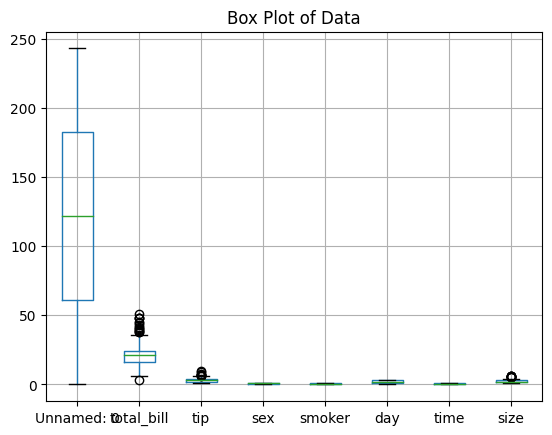

In [69]:
import matplotlib.pyplot as plt


df.boxplot()
plt.title('Box Plot of Data')
plt.show()


In [70]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [71]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.990000,1.01,0,0,2,0,2
1,21.360195,1.66,1,0,2,0,3
2,21.010000,3.50,1,0,2,0,3
3,23.680000,3.31,1,0,2,0,2
4,24.590000,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.030000,5.92,1,0,1,0,3
240,27.180000,2.00,0,1,1,0,2
241,22.670000,2.00,1,1,1,0,2
242,17.820000,1.75,1,0,1,0,2


In [72]:
##standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [73]:
pd.DataFrame(df_scaled)

,0,1,2,3,4,5,6
0,-0.538972,-1.439947,-1.343353,-0.784789,0.279158,-0.621582,-0.600193
1,0.000000,-0.969205,0.744406,-0.784789,0.279158,-0.621582,0.453383
2,-0.043189,0.363356,0.744406,-0.784789,0.279158,-0.621582,0.453383
3,0.286099,0.225754,0.744406,-0.784789,0.279158,-0.621582,-0.600193
4,0.398329,0.443020,-1.343353,-0.784789,0.279158,-0.621582,1.506958
...,...,...,...,...,...,...,...
239,0.945909,2.115963,0.744406,-0.784789,-0.802024,-0.621582,0.453383
240,0.717751,-0.722971,-1.343353,1.274228,-0.802024,-0.621582,-0.600193
241,0.161537,-0.722971,0.744406,1.274228,-0.802024,-0.621582,-0.600193
242,-0.436609,-0.904026,0.744406,-0.784789,-0.802024,-0.621582,-0.600193


(array([14., 27., 55., 24., 41., 25., 20.,  7., 13.,  6.,  4.,  1.,  4.,
         0.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([-1.44718913, -1.12129109, -0.79539305, -0.46949501, -0.14359697,
         0.18230107,  0.50819911,  0.83409715,  1.15999519,  1.48589324,
         1.81179128,  2.13768932,  2.46358736,  2.7894854 ,  3.11538344,
         3.44128148,  3.76717952,  4.09307756,  4.41897561,  4.74487365,
         5.07077169]),
 <BarContainer object of 20 artists>)

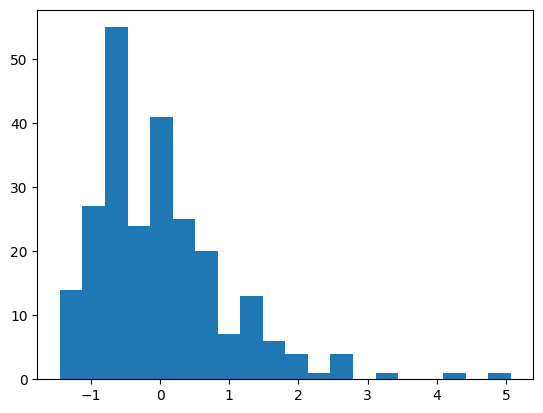

In [74]:
plt.hist(df_scaled[:,1], bins = 20)
## all the rows and 2nd column 

(array([ 87.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 157.]),
 array([-1.34335316, -1.2389652 , -1.13457725, -1.0301893 , -0.92580135,
        -0.82141339, -0.71702544, -0.61263749, -0.50824954, -0.40386159,
        -0.29947363, -0.19508568, -0.09069773,  0.01369022,  0.11807818,
         0.22246613,  0.32685408,  0.43124203,  0.53562998,  0.64001794,
         0.74440589]),
 <BarContainer object of 20 artists>)

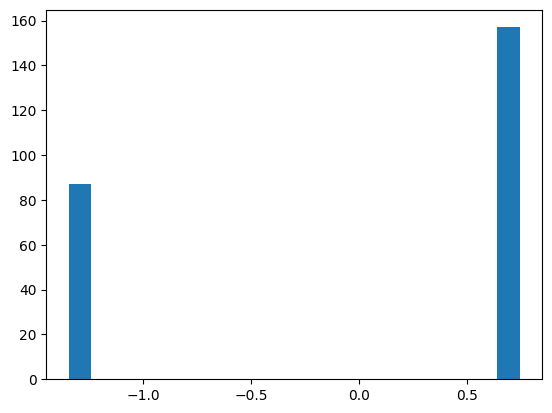

In [75]:
plt.hist(df_scaled[:,2], bins = 20)
## all the rows and 3rd column 

In [76]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df), columns= df.columns)
df_minmax.head()

,total_bill,tip,sex,smoker,day,time,size
0,0.291579,0.001111,0.0,0.0,0.666667,0.0,0.2
1,0.383121,0.073333,1.0,0.0,0.666667,0.0,0.4
2,0.375786,0.277778,1.0,0.0,0.666667,0.0,0.4
3,0.431713,0.256667,1.0,0.0,0.666667,0.0,0.2
4,0.450775,0.290000,0.0,0.0,0.666667,0.0,0.6


(array([ 1.,  6., 10.,  0., 24., 37., 28., 62., 18., 13., 10.,  9.,  5.,
         7.,  3.,  4.,  1.,  2.,  3.,  1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

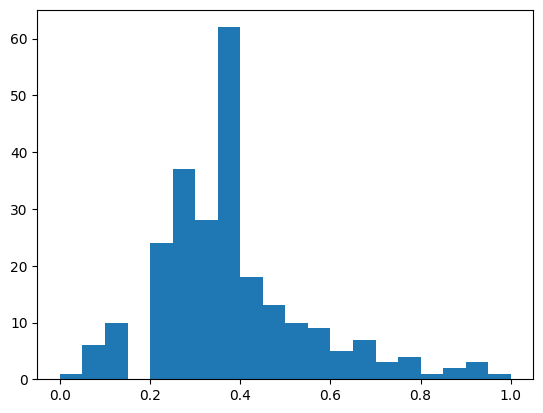

In [77]:
plt.hist(df_minmax['total_bill'], bins = 20)

(array([151.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  93.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

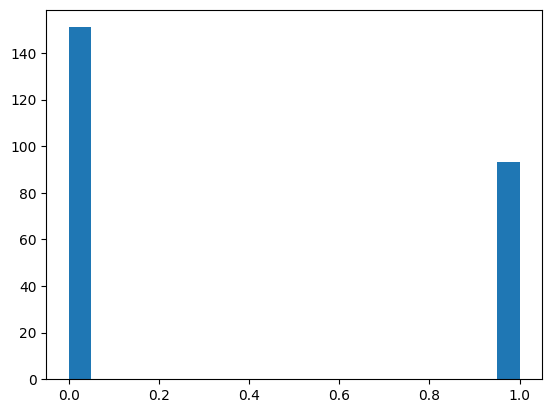

In [78]:
plt.hist(df_minmax['smoker'], bins = 20)

In [79]:
df['tip_percentage'] = df['tip'] / df['total_bill'] * 100
average_tip_percentage = df['tip_percentage'].mean()
print("Average tip percentage:", average_tip_percentage)

Average tip percentage: 14.855322162910602


In [80]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.990000,1.01,0,0,2,0,2,5.944673
1,21.360195,1.66,1,0,2,0,3,7.771465
2,21.010000,3.50,1,0,2,0,3,16.658734
3,23.680000,3.31,1,0,2,0,2,13.978041
4,24.590000,3.61,0,0,2,0,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.030000,5.92,1,0,1,0,3,20.392697
240,27.180000,2.00,0,1,1,0,2,7.358352
241,22.670000,2.00,1,1,1,0,2,8.822232
242,17.820000,1.75,1,0,1,0,2,9.820426


In [81]:
# Create a new feature based on total bill and tips if total bill is greater than 10$ and tips is greater
# than 3$ mark as Highest-bills-with-tips otherwise Normal-bills
import pandas as pd

df['bill_type'] = 'Normal-bills'  # Initialize all values as 'Normal-bills'
df.loc[(df['total_bill'] > 10) & (df['tip'] > 3), 'bill_type'] = 'Highest-bills-with-tips'

df


,total_bill,tip,sex,smoker,day,time,size,tip_percentage,bill_type
0,16.990000,1.01,0,0,2,0,2,5.944673,Normal-bills
1,21.360195,1.66,1,0,2,0,3,7.771465,Normal-bills
2,21.010000,3.50,1,0,2,0,3,16.658734,Highest-bills-with-tips
3,23.680000,3.31,1,0,2,0,2,13.978041,Highest-bills-with-tips
4,24.590000,3.61,0,0,2,0,4,14.680765,Highest-bills-with-tips
...,...,...,...,...,...,...,...,...,...
239,29.030000,5.92,1,0,1,0,3,20.392697,Highest-bills-with-tips
240,27.180000,2.00,0,1,1,0,2,7.358352,Normal-bills
241,22.670000,2.00,1,1,1,0,2,8.822232,Normal-bills
242,17.820000,1.75,1,0,1,0,2,9.820426,Normal-bills
